# Part 1: Analyze the network

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import powerlaw

The directed network is downloaded from a .graphml file.

In [35]:
G = nx.read_graphml("new_network/new_rock_artists.graphml")

> Present an analysis/description of the network of bands/artists using tools from Lecture 5. Imagine that you have been tasked with presenting the important facts about the network to an audience who knows about network science, but doesn't know about this particular network.

# 1. Qualitative Analysis

We begin with a qualitative analysis of the network, focusing on the in-degree and out-degree of its nodes.

The **in-degree** of a node indicates how many artists mention that particular artist, reflecting their influence and popularity. The three artists with the highest in-degree are The Beatles, The Rolling Stones, and Led Zeppelin. These nodes represent highly influential figures in rock music, supporting that nodes with high in-degree correspond to the most influential artists in the network.

The **out-degree** of a node measures how many artists a node references. The artists with the highest out-degree are Alice in Chains, Deep Purple, and Black Sabbath. Analysis of their Wikipedia pages shows that they reference bands that influenced them and vice versa or shared the same musical scene. These artists do not have a highly influential presence in the network but they contribute to its structure through their connections.

Overall, highly influential artists tend to have high in-degree but average out-degree, whereas smaller but still significant artists may show the opposite pattern.

A scatter plot of in-degree versus out-degree shows that the majority of artists cluster near the origin, indicating low in-degree and low out-degree, with highly influential artists appear as outliers with very high in-degree but moderate out-degree.

In [105]:
#Highest in
in_degrees = dict(G.in_degree())
sorted_nodes_in = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)
highest_in=sorted_nodes_in[:3]
print("Highest in-degree nodes and their in-degree value:", highest_in)

Highest in-degree nodes and their in-degree value: [('the beatles', 171), ('the rolling stones', 122), ('led zeppelin', 119)]


In [106]:
#Highest out 
out_degrees = dict(G.out_degree())
sorted_nodes_out = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)
highest_out=sorted_nodes_out[:3]
print("Highest out-degree nodes and their out-degree value:", highest_out)

Highest out-degree nodes and their out-degree value: [('alice in chains', 77), ('deep purple', 76), ('black sabbath', 64)]


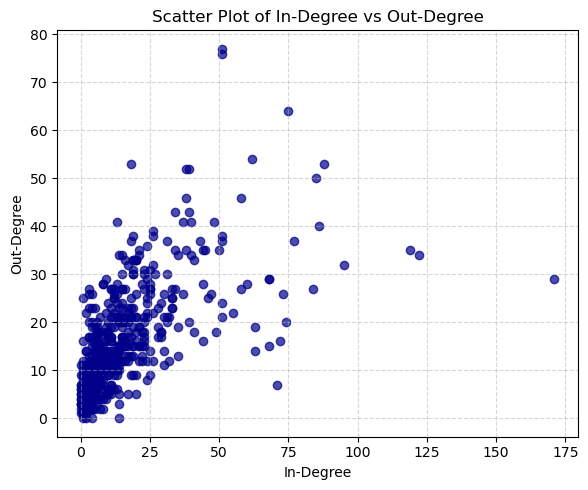

In [109]:
# in-degree and out-degree lists
in_d = [d for _, d in G.in_degree()]
out_d = [d for _, d in G.out_degree()]

plt.figure(figsize=(6, 5))
plt.scatter(in_d, out_d, marker='o', color='darkblue', alpha=0.7)
plt.title('Scatter Plot of In-Degree vs Out-Degree')
plt.xlabel('In-Degree')
plt.ylabel('Out-Degree')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2. Quantitative Analysis

Then we move on to a quantitative analysis where we will explore degree distribution, length of content attribute, centrality and assortativity.

## 2.1. Degree distributions

Since it is a directed network, analyzing the in-degree, out-degree, and total degree distributions provides a more complete understanding of the network’s structure and dynamics. 

The **in-degree distribution P(kin)** gives the probability that a node has kin incoming links and reveals patterns of influence and popularity, while the **out-degree distribution** P(kout) gives the probability of a node having kout outgoing links. The **total degree distribution** P(k) groups these two and corresponds to the probability that a node has k=kin+kout total connections in the network, representing a balance between influence and connectivity.

### 2.1.1. In degree distribution

The histogram of the network’s in-degree distribution presents a heavy-tail, meaning most artists are mentioned on only a few other artists’ pages, while a small number of highly influential artists are referenced across many pages, consistent with the patterns observed in the previous scatter plot. On a log–log plot, the distribution declines almost linearly, indicating a possible power-law behavior.

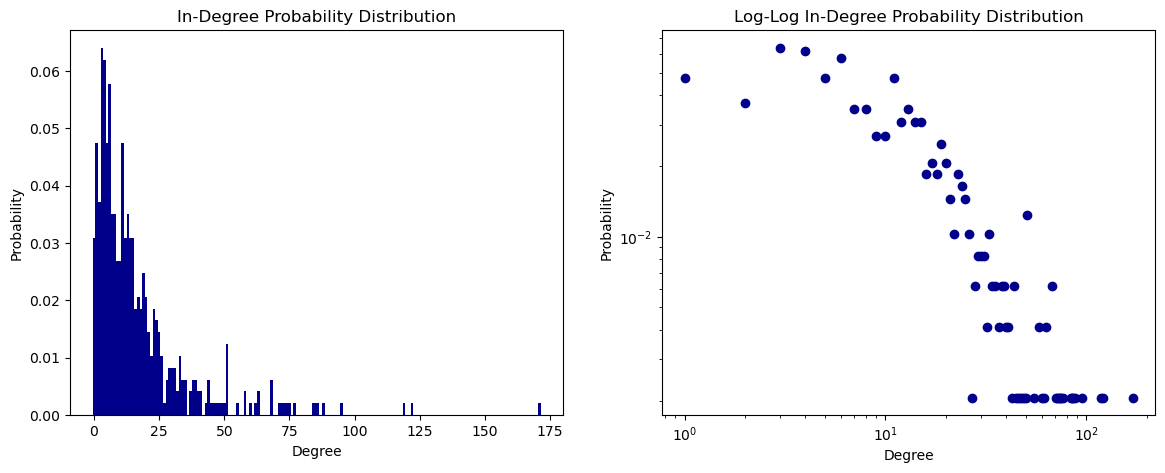

In [111]:
#in_d = [d for _, d in G.in_degree()]
in_d_sort = sorted(in_d)

max_in=max(in_d_sort)
min_in=min(in_d_sort)
v_in=np.arange(min_in, max_in+2)

# counts
in_counts, in_bins = np.histogram(in_d_sort, bins=v_in)

# probabilities
in_probs = in_counts / in_counts.sum()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].bar(in_bins[:-1], in_probs, width=np.diff(in_bins), color='darkblue')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Probability')
axes[0].set_title('In-Degree Probability Distribution')

axes[1].scatter(in_bins[:-1], in_probs, marker='o', color='darkblue')
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Probability')
axes[1].set_title('Log-Log In-Degree Probability Distribution')
plt.show()

To further investigate whether the degree distribution follows a power law, its exponent was estimated using the powerlaw package. The resulting exponent was approximately 2.7 and applies to nodes with degree greater than 19, as identified by the package. Since this value lies between 2 and 3, it suggests the network exhibits scale-free characteristics, where a few nodes called hubs have many links and play a central role in overall connectivity. However, this scale-free behavior is observed only in the tail of the distribution, rather than across the entire network, due to the cutoff at xmin = 19.

In [70]:
fit_in = powerlaw.Fit(in_d,discrete=True)
alpha_in = fit_in.alpha
xmin_in=fit_in.xmin
print("In-degree exponent (alpha):", alpha_in)
print("xmin:", xmin_in)

Calculating best minimal value for power law fit
In-degree exponent (alpha): 2.7123416618256444
xmin: 19.0


Values less than or equal to 0 in data. Throwing out 0 or negative values


Since it is not obvious that the in degree distribution follows a powerlaw, we compared different degree distribution models. The log-normal distribution fits the data slightly better than the power-law, with negative R value, although the p-value suggests this evidence is not strong. The power-law and exponential models show similar plausibility, with no significant difference between them. Likewise, the log-normal appears to fit better than the exponential, but again with low confidence.

In [71]:
# Compare to log-normal
R_ln_in, p_ln_in = fit_in.distribution_compare('power_law', 'lognormal')
print("Power-law vs lognormal: R =", R_ln_in, ", p =", p_ln_in)

# Compare to exponential
R_exp_in, p_exp_in = fit_in.distribution_compare('power_law', 'exponential')
print("Power-law vs exponential: R =", R_exp_in, ", p =", p_exp_in)

# Compare to exponential
R_expln_in, p_expln_in = fit_in.distribution_compare('lognormal', 'exponential')
print("Log-normal vs exponential: R =", R_expln_in, ", p =", p_expln_in)

Power-law vs lognormal: R = -3.429503097832927 , p = 0.0985283815914586
Power-law vs exponential: R = -0.4404399184426442 , p = 0.9278100416306371
Log-normal vs exponential: R = 2.989063179390289 , p = 0.30144117913571666


These distributions were plotted alongside the data for visual inspection. Although the plots start at x=19, they still provide insight into the tail behavior. Overall, the network shows heavy-tailed behavior that resembles a log-normal distribution, but this is not strongly supported statistically. This heavy-tailed behaviour indicates that most nodes have low in degrees, while a few hubs, the highly influential artists, present many connections.

Log-normal fit: mu = 2.3359080462160744 , sigma = 0.9531969132015838
Exponential fit: lambda = 0.05182770022042621


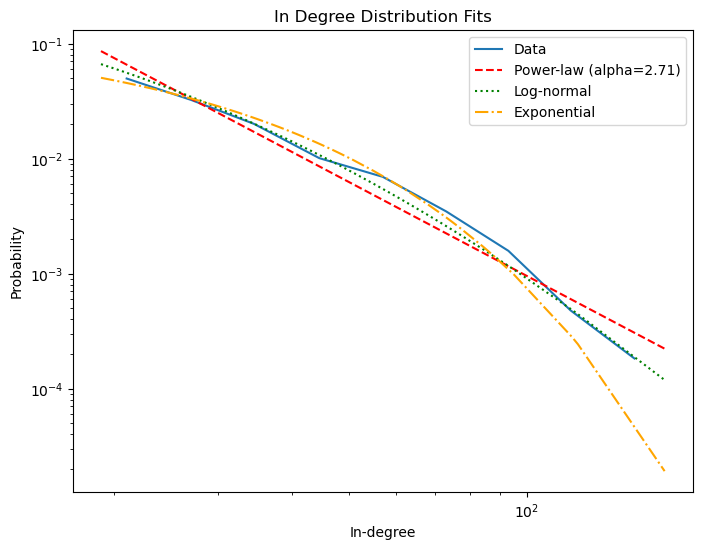

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

# Log-normal parameters
mu_in = fit_in.lognormal.mu
sigma_in = fit_in.lognormal.sigma
print("Log-normal fit: mu =", mu_in, ", sigma =", sigma_in)

# Exponential parameters
lambda_exp_in = fit_in.exponential.parameter1
print("Exponential fit: lambda =", lambda_exp_in)

# Plot PDF comparison
fig, ax = plt.subplots(figsize=(8,6))
fit_in.plot_pdf(label='Data')
fit_in.power_law.plot_pdf(color='red', linestyle='--', label=f'Power-law (alpha={alpha_in:.2f})')
fit_in.lognormal.plot_pdf(color='green', linestyle=':', label='Log-normal')
fit_in.exponential.plot_pdf(color='orange', linestyle='-.', label='Exponential')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('In-degree')
ax.set_ylabel('Probability')
ax.set_title('In Degree Distribution Fits')
ax.legend()
plt.show()

### 2.1.2. Out degree distribution

The out-degree distribution is right-skewed and long-tailed, with most nodes having between 5 and 20 out going links and only a few exceeding 40. On the log–log plot, low out-degree nodes present a high probability, while higher out-degree nodes spread downward, showing decreasing probability for nodes with more out-links. Although a few hubs exist, the pattern does not seem to follow a power law, and the network is dominated by typical artists with few outgoing references.

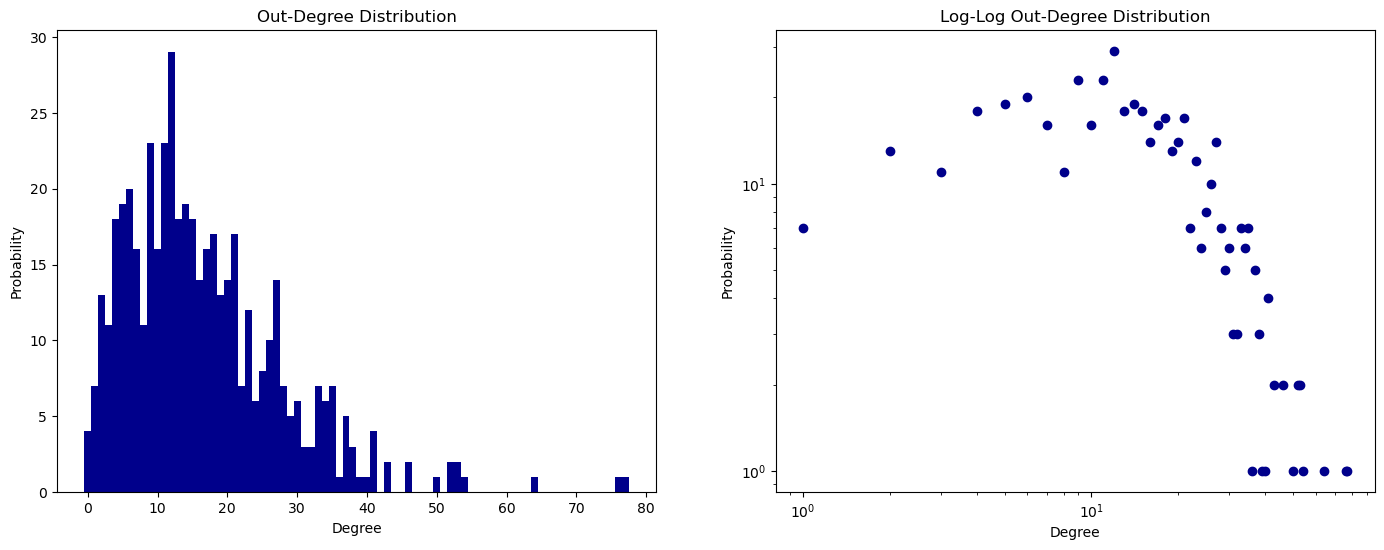

In [47]:
out_d_sort = sorted(out_d)

max_out=max(out_d_sort)
min_out=min(out_d_sort)
v_out=np.arange(min_out, max_out+2)

# counts
out_counts, out_bins = np.histogram(out_d_sort, bins=v_out)
# probabilities
out_probs = out_counts / out_counts.sum()

fig, axes = plt.subplots(1, 2, figsize=(17, 6))

# in degree distribution
axes[0].bar(out_bins[:-1], out_counts, width=np.diff(out_bins), color='darkblue')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Probability')
axes[0].set_title('Out-Degree Distribution')

# log-log in degree distribution
axes[1].scatter(out_bins[:-1], out_counts, marker='o', color = 'darkblue')
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Probability')
axes[1].set_title('Log-Log Out-Degree Distribution')

plt.show()

The xmin estimated with the powerlaw package support that the out-degree distribution is not a power law, since its high value of 33 means the power-law model only applies to a small portion of the data. The exponent greater than 3 suggests the network does not exhibit scale-free behavior, which aligns with the observation that very few nodes have a large number of outgoing links.

In [52]:
fit_out = powerlaw.Fit(out_d,discrete=True)
alpha_out = fit_out.alpha
xmin_out=fit_out.xmin
print("In-degree exponent (alpha):", alpha_out)
print("xmin:", xmin_out)

Calculating best minimal value for power law fit
In-degree exponent (alpha): 5.830719630959893
xmin: 33.0


Values less than or equal to 0 in data. Throwing out 0 or negative values


Once again, we compared different distributions but the data does not strongly favor any particular model.

In [112]:
# Compare to log-normal
R_ln_out, p_ln_out = fit_out.distribution_compare('power_law', 'lognormal')
print("Power-law vs lognormal: R =", R_ln_out, ", p =", p_ln_out)

# Compare to exponential
R_exp_out, p_exp_out = fit_out.distribution_compare('power_law', 'exponential')
print("Power-law vs exponential: R =", R_exp_out, ", p =", p_exp_out)

# Compare to exponential
R_expln_out, p_expln_out = fit_out.distribution_compare('lognormal', 'exponential')
print("Log-normal vs exponential: R =", R_expln_out, ", p =", p_expln_out)

Power-law vs lognormal: R = 0.00042028205398869645 , p = 0.9731733439451171
Power-law vs exponential: R = 1.1946721301773109 , p = 0.2904683182203369
Log-normal vs exponential: R = 1.1942518481233222 , p = 0.2907290336350299


### 2.1.3. Total degree distribution

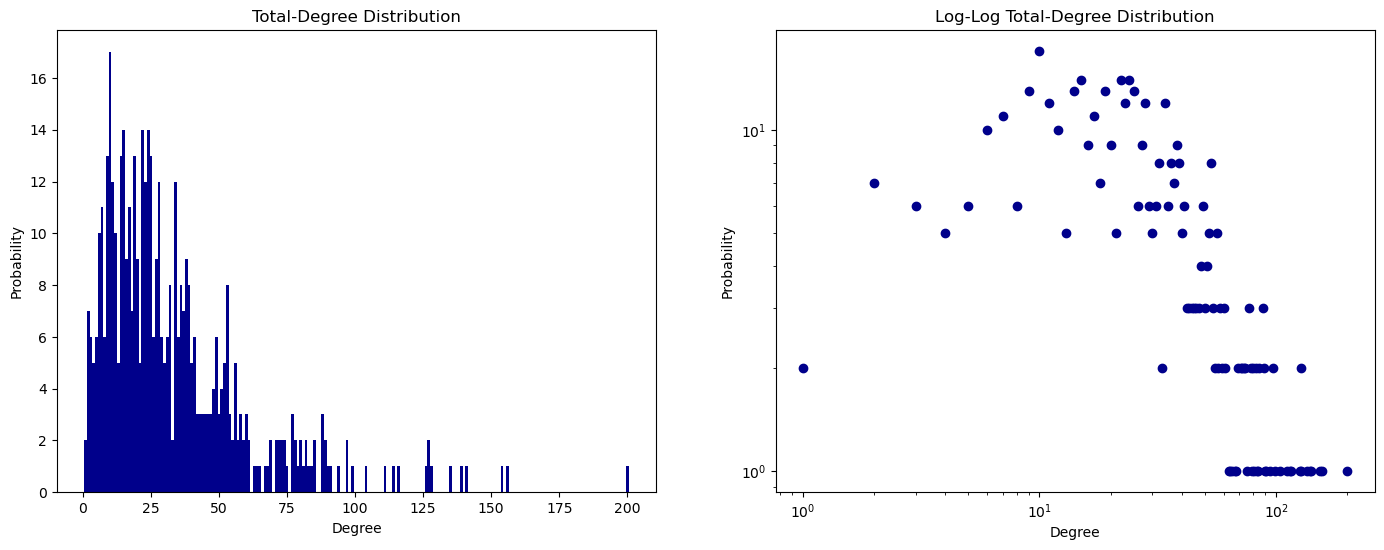

In [ ]:
total_d = [d for _, d in G.degree()]
total_d_sort = sorted(total_d)

max_total=max(total_d_sort)
min_total=min(total_d_sort)
v_total=np.arange(min_total, max_total+2)

# counts
total_counts, total_bins = np.histogram(total_d_sort, bins=v_total)
# probabilities
total_probs = total_counts / total_counts.sum()

fig, axes = plt.subplots(1, 2, figsize=(17, 6))

# in degree distribution
axes[0].bar(total_bins[:-1], total_counts, width=np.diff(total_bins), color='darkblue')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Probability')
axes[0].set_title('Total-Degree Distribution')

# log-log in degree distribution
axes[1].scatter(total_bins[:-1], total_counts, marker='o', color = 'darkblue')
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Probability')
axes[1].set_title('Log-Log Total-Degree Distribution')
plt.show()

In [74]:
fit_total = powerlaw.Fit(total_d,discrete=True)
alpha_total = fit_total.alpha
xmin_total = fit_total.xmin
print("In-degree exponent (alpha):", alpha_total)
print("xmin:", xmin_total)

Calculating best minimal value for power law fit
In-degree exponent (alpha): 4.504202887404322
xmin: 71.0


In [116]:
# Compare to log-normal
R_ln_out, p_ln_out = fit_total.distribution_compare('power_law', 'lognormal')
print("Power-law vs lognormal: R =", R_ln_out, ", p =", p_ln_out)

# Compare to exponential
R_exp_out, p_exp_out = fit_total.distribution_compare('power_law', 'exponential')
print("Power-law vs exponential: R =", R_exp_out, ", p =", p_exp_out)

# Compare to exponential
R_expln_out, p_expln_out = fit_total.distribution_compare('lognormal', 'exponential')
print("Log-normal vs exponential: R =", R_expln_out, ", p =", p_expln_out)

Power-law vs lognormal: R = -0.5704999260024266 , p = 0.4609841066210114
Power-law vs exponential: R = -0.5559020941103765 , p = 0.6469807719980458
Log-normal vs exponential: R = 0.014597831892050106 , p = 0.9740817764494625


### 2.1.4. Conclusions

## 2.2. Length of content attribute

Compare length of content of node i with out degree of node i

Pearson correlation measures linear correlation and Spearman is not linear but it is monotonically increasing. 

Correlation values are high so we can conclude that more text (longer lenght) represents more links being in the text (out degree).

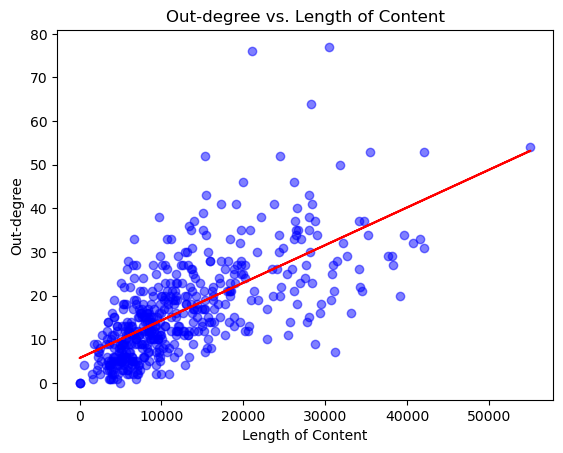

Pearson correlation: 0.6651431236717017
Spearman correlation: 0.7081279093341742


In [80]:
from scipy.stats import spearmanr, pearsonr

length_of_content = np.array(list(nx.get_node_attributes(G, 'length_of_content').values()))
out_degree = np.array(list(dict(G.out_degree()).values()))

# Assuming length_of_content, out_degree are numpy arrays
plt.scatter(length_of_content, out_degree, alpha=0.5, c='blue')
slope, intercept = np.polyfit(length_of_content, out_degree, 1) 
plt.plot(length_of_content, slope * length_of_content + intercept, color='red', label='Fit line')

plt.xlabel("Length of Content")
plt.ylabel("Out-degree")
plt.title("Out-degree vs. Length of Content")
plt.show()

# Calculate correlations
pearson_corr = pearsonr(length_of_content, out_degree)
spearman_corr = spearmanr(length_of_content, out_degree)
print("Pearson correlation:", pearson_corr.statistic)
print("Spearman correlation:", spearman_corr.statistic)

Compare length of content of node i with in degree of node i

More text, that artist is more famous? yes

The stronger phenomenon is the more text, the more mentioned artists and not the more text, the more famous the artist is.

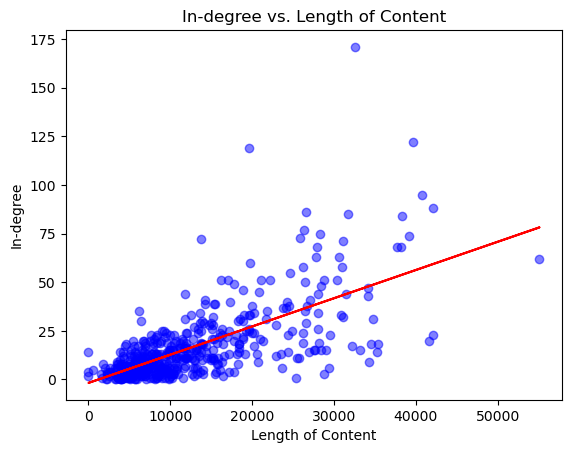

Pearson correlation: 0.6695854698018071
Spearman correlation: 0.6701100965615129


In [81]:
in_degree = np.array(list(dict(G.in_degree()).values()))

# Assuming length_of_content, out_degree are numpy arrays
plt.scatter(length_of_content, in_degree, alpha=0.5, c='blue')
slope, intercept = np.polyfit(length_of_content, in_degree, 1) 
plt.plot(length_of_content, slope * length_of_content + intercept, color='red', label='Fit line')

plt.xlabel("Length of Content")
plt.ylabel("In-degree")
plt.title("In-degree vs. Length of Content")
plt.show()

# Calculate correlations
pearson_corr = pearsonr(length_of_content, in_degree)
spearman_corr = spearmanr(length_of_content, in_degree)
print("Pearson correlation:", pearson_corr.statistic)
print("Spearman correlation:", spearman_corr.statistic)

## 2.3. Centrality

Centrality measures the relative importance of nodes within a network, with different metrics capturing different aspects of that importance. We focus on three types: degree centrality, betweenness centrality and eigenvector centrality.

**In-degree and out-degree centrality** is calculated by normalizing the number of incoming or outgoing links for each node so nodes with more links are considered more central. We can see that nodes with higher in degree centrality correspond to the nodes with highest in degree and that nodes with higher out degree centrality correspond to the nodes with highest out degree.

In [92]:
indegree_c = nx.in_degree_centrality(G)
sorted_in = sorted(indegree_c.items(), key=lambda x: x[1], reverse=True)
top5_in = [sorted_in[i][0] for i in range(5)]
print("Top 5 nodes by in-degree centrality:", top5_in)

outdegree_c = nx.out_degree_centrality(G)
sorted_out = sorted(outdegree_c.items(), key=lambda x: x[1], reverse=True)
top5_out = [sorted_out[i][0] for i in range(5)]
print("Top 5 nodes by out-degree centrality:", top5_out)

Top 5 nodes by in-degree centrality: ['the beatles', 'the rolling stones', 'led zeppelin', 'bob dylan', 'queen (band)']
Top 5 nodes by out-degree centrality: ['alice in chains', 'deep purple', 'black sabbath', "guns n' roses", 'queen (band)']


**Betweenness centrality** measures how often a node lies on the shortest paths between other nodes, identifying the ones that act as bridges in the network. In a rock artist network, these nodes can represent a connection between different scenes or genres, for example, by being popular in different movements.

In [117]:
bet_c=nx.betweenness_centrality(G)
sorted_bet_c = sorted(bet_c.items(), key=lambda x: x[1], reverse=True)
bet_c5=[sorted_bet_c[i][0] for i in range(5)]
print("Top 5 nodes by betweenness centrality:",bet_c5)

Top 5 nodes by betweenness centrality: ['deep purple', 'queen (band)', 'the rolling stones', 'alice in chains', "guns n' roses"]


**Eigenvector centrality** assigns higher scores to nodes connected to other highly connected nodes, reflecting their influence in the network. In-eigenvector centrality measures importance based on the importance of nodes that point to the node in questin. Nodes with high in-eigenvector centrality are influential because they are referenced by other highly influential nodes. Out-eigenvector centrality measures a node’s importance based on the importance of nodes it points to. Nodes with high out-eigenvector centrality are connected to influential nodes. For example, a rock artist who is mentioned by several highly influential artists will have high eigenvector centrality even if not mentioned by many artists.

In [98]:
# In
ineig_c = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)
top5_in = sorted(ineig_c.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 in-eigenvector centrality:", [x[0] for x in top5_in])

#Out
outeig_c = nx.eigenvector_centrality(G.reverse(), max_iter=1000, tol=1e-06)
top5_out = sorted(outeig_c.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 out-eigenvector centrality:", [x[0] for x in top5_out])

Top 5 in-eigenvector centrality: ['the beatles', 'the rolling stones', 'led zeppelin', 'the who', 'bob dylan']
Top 5 out-eigenvector centrality: ['alice in chains', 'deep purple', 'black sabbath', 'metallica', 'megadeth']


### 2.3.1. Betweenness centrality vs degree centrality

Plotting betweenness centrality against in-degree centrality shows how a node’s influence relates to its role as a bridge in the network. The correlation value indicates a strong positive relationship, meaning that nodes with higher in-degree generally also have higher betweenness. This suggests that, in this network, highly referenced nodes are often also key bridges connecting different parts of the network.

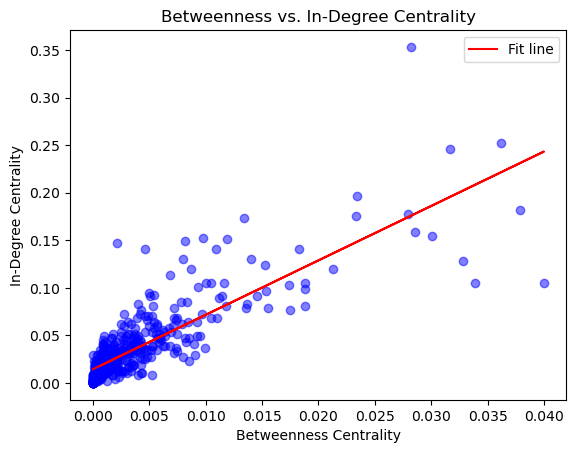

Pearson correlation: 0.8320025215758797


In [119]:
bet_c_list = list(bet_c.values())
indegree_c_list = list(indegree_c.values())

plt.scatter(bet_c_list, indegree_c_list, alpha=0.5, c='blue')

# Linear fit
slope, intercept = np.polyfit(bet_c_list, indegree_c_list, 1)
plt.plot(bet_c_list, slope * np.array(bet_c_list) + intercept, color='red', label='Fit line')

plt.xlabel("Betweenness Centrality")
plt.ylabel("In-Degree Centrality")
plt.title("Betweenness vs. In-Degree Centrality")
plt.legend()
plt.show()

# Calculate correlations
pearson_corr = pearsonr(bet_c_list, indegree_c_list)
print("Pearson correlation:", pearson_corr.statistic)

The relationship between betweenness centrality and out-degree centrality is slightly weaker than that with in-degree, as reflected by the lower correlation, though it is still relatively strong. This indicates that nodes with high out-degree can serve as bridges in the network, but they are less consistently central in connecting different parts of the network compared to nodes with high in-degree.

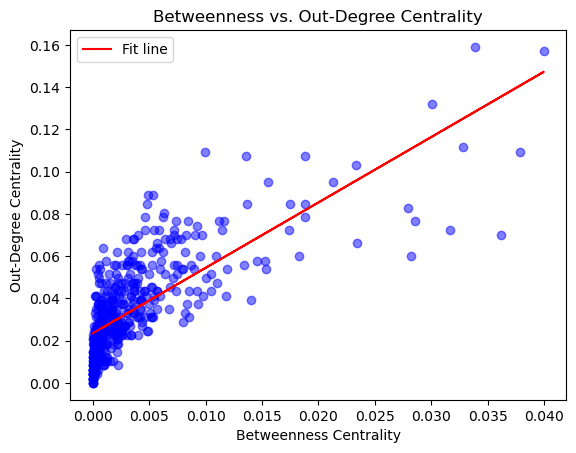

Pearson correlation: 0.7521478125219854


In [120]:
bet_c_list = list(bet_c.values())
outdegree_c_list = list(outdegree_c.values())

plt.scatter(bet_c_list, outdegree_c_list, alpha=0.5, c='blue')

# Linear fit
slope, intercept = np.polyfit(bet_c_list, outdegree_c_list, 1)
plt.plot(bet_c_list, slope * np.array(bet_c_list) + intercept, color='red', label='Fit line')

plt.xlabel("Betweenness Centrality")
plt.ylabel("Out-Degree Centrality")
plt.title("Betweenness vs. Out-Degree Centrality")
plt.legend()
plt.show()

# Calculate correlations
pearson_corr = pearsonr(bet_c_list, outdegree_c_list)
print("Pearson correlation:", pearson_corr.statistic)

### 2.3.1. Eigenvector centrality vs degree centrality

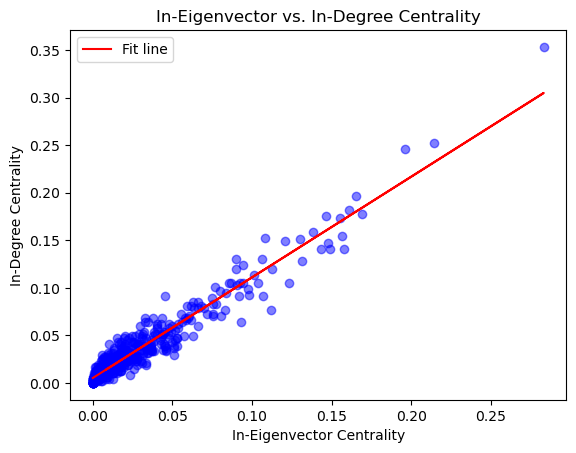

Pearson correlation: 0.9657800599491063
Spearman correlation: 0.9313073512828584


In [99]:
ineig_c_list= list(ineig_c.values())

plt.scatter(ineig_c_list, indegree_c_list, alpha=0.5, c='blue')

# Linear fit
slope, intercept = np.polyfit(ineig_c_list, indegree_c_list, 1)
plt.plot(ineig_c_list, slope * np.array(ineig_c_list) + intercept, color='red', label='Fit line')

plt.xlabel("In-Eigenvector Centrality")
plt.ylabel("In-Degree Centrality")
plt.title("In-Eigenvector vs. In-Degree Centrality")
plt.legend()
plt.show()

# Calculate correlations
pearson_corr = pearsonr(ineig_c_list, indegree_c_list)
spearman_corr = spearmanr(ineig_c_list, indegree_c_list)
print("Pearson correlation:", pearson_corr.statistic)
print("Spearman correlation:", spearman_corr.statistic)

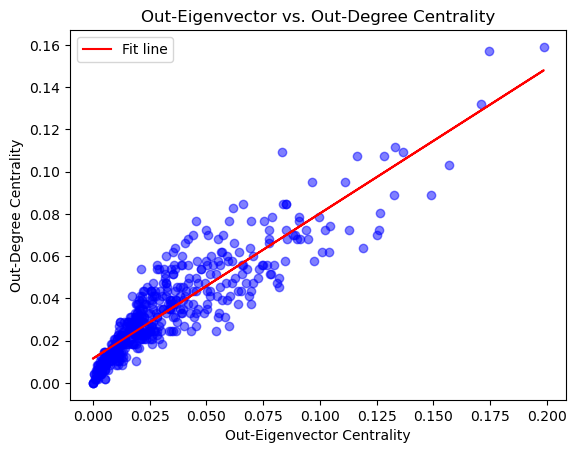

Pearson correlation: 0.8981880637727727
Spearman correlation: 0.9169458873781867


In [101]:
outeig_c_list= list(outeig_c.values())

plt.scatter(outeig_c_list, outdegree_c_list, alpha=0.5, c='blue')

# Linear fit
slope, intercept = np.polyfit(outeig_c_list, outdegree_c_list, 1)
plt.plot(outeig_c_list, slope * np.array(outeig_c_list) + intercept, color='red', label='Fit line')

plt.xlabel("Out-Eigenvector Centrality")
plt.ylabel("Out-Degree Centrality")
plt.title("Out-Eigenvector vs. Out-Degree Centrality")
plt.legend()
plt.show()

# Calculate correlations
pearson_corr = pearsonr(outeig_c_list, outdegree_c_list)
spearman_corr = spearmanr(outeig_c_list, outdegree_c_list)
print("Pearson correlation:", pearson_corr.statistic)
print("Spearman correlation:", spearman_corr.statistic)

### Assortativity

**Relative to degree**

In [102]:
G_und=G.to_undirected(reciprocal=False, as_view=False)
degree_assort=nx.degree_assortativity_coefficient(G_und)
degree_assort

-0.01941766166206628

If assortativity ≈ 0

No clear pattern; connections are random with respect to degree.

No because low degree nodes dont tend to connect to low degree nodes, they actually tend to connect to high degree nodes.

**Relative tolength of content**

In [103]:
degree_assort_length=nx.attribute_assortativity_coefficient(G_und,"length_of_content")
degree_assort_length

-0.003299574863728513

# **LIXO**

In [ ]:
#Neighbours pointing to
beatles_neigh=list(G.predecessors('the beatles'))
print(beatles_neigh[:10])

trs_neigh=list(G.predecessors('the rolling stones'))
print(trs_neigh[:10])

ledz_neigh=list(G.predecessors('led zeppelin'))
print(ledz_neigh[:10])

In [ ]:
#Neighbours they point to
alice_neigh=list(G.successors('alice in chains'))
print(alice_neigh[:10])

dp_neigh=list(G.successors('deep purple'))
print(dp_neigh[:10])

bs_neigh=list(G.successors('black sabbath'))
print(bs_neigh[:10])

In [ ]:
in_d = [d for _, d in G.in_degree()]
out_d = [d for _, d in G.out_degree()]

heatmap, xedges, yedges = np.histogram2d(in_d, out_d, bins=30, range=[[0, 30], [0, 30]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(in_d, out_d, marker='o', color='darkblue')
axes[0].set_title('Scatter Plot of In-Degree vs Out-Degree')
axes[0].set_xlabel('In-Degree')
axes[0].set_ylabel('Out-Degree')

im = axes[1].imshow(heatmap.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')
axes[1].set_title('Heatmap of In-Degree vs Out-Degree (Zoomed to [0,30])')
axes[1].set_xlabel('In-Degree')
axes[1].set_ylabel('Out-Degree')
axes[1].set_xticks(np.arange(0, 31, 5))
axes[1].set_yticks(np.arange(0, 31, 5))
fig.colorbar(im, ax=axes[1], label='Count')

plt.tight_layout()
plt.show()

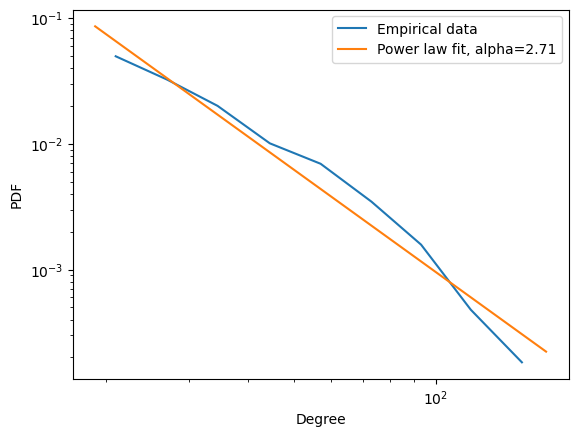

In [74]:
fit_in.plot_pdf(label='Empirical data')
fit_in.power_law.plot_pdf(label=f'Power law fit, alpha={alpha_in:.2f}')
plt.xlabel("Degree")
plt.ylabel("PDF")
plt.legend()
plt.show()

entre 2 e 3: scale free
maior que 3: hubs exist but less pronouced

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# empirical pdf
fit_in.plot_pdf(label='Data')

# fitted power-law
fit_in.power_law.plot_pdf(color='red', linestyle='--', label=f'Power-law fit (alpha={alpha_in:.2f})')

plt.axvline(fit_in.xmin, color='gray', linestyle='--', label=f'xmin = {fit_in.xmin}')

ax.set_xlabel('In-degree')
ax.set_ylabel('Probability')
ax.set_title('Log-Log In-Degree Distribution with Power-law Fit')
ax.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

# Log-normal parameters
mu_out = fit_out.lognormal.mu
sigma_out = fit_out.lognormal.sigma
print("Log-normal fit: mu =", mu_out, ", sigma =", sigma_out)

# Exponential parameters
lambda_exp_out = fit_out.exponential.parameter1
print("Exponential fit: lambda =", lambda_exp_out)

# Plot PDF comparison
fig, ax = plt.subplots(figsize=(8,6))
fit_out.plot_pdf(label='Data')
fit_out.power_law.plot_pdf(color='red', linestyle='--', label=f'Power-law (alpha={alpha_out:.2f})')
fit_out.lognormal.plot_pdf(color='green', linestyle=':', label='Log-normal')
fit_out.exponential.plot_pdf(color='orange', linestyle='-.', label='Exponential')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('In-degree')
ax.set_ylabel('Probability')
ax.set_title('Degree Distribution Fits')
ax.legend()
plt.show()

In [ ]:
import powerlaw
import matplotlib.pyplot as plt
import numpy as np

# Plot full empirical PDF manually
fit_in.plot_pdf(label='Tail data (≥ xmin)', color='blue')
fit_in.power_law.plot_pdf(color='red', linestyle='--', label='Power law fit')

# Add full empirical distribution (all data)
counts, bins = np.histogram(in_d, bins=np.arange(min(in_d), max(in_d)+2))
probs = counts / counts.sum()
plt.scatter(bins[:-1], probs, color='gray', alpha=0.5, label='All data (unfitted)')

plt.axvline(fit_in.xmin, color='black', linestyle=':', label=f'xmin = {fit_in.xmin:.0f}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('In-degree')
plt.ylabel('Probability')
plt.title('Full vs Fitted In-Degree Distribution')
plt.legend()
plt.show()